In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load California housing dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42) # n_estimators=100 specifies that we will use 100 decision trees in the forest.

# Train the Random Forest model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


# Make predictions
y_pred = model.predict(X_test)

# Calculate MSE, RMSE and the coefficient of determination (R^2)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

MSE: 0.26
RMSE: 0.51
R^2 Score: 0.81


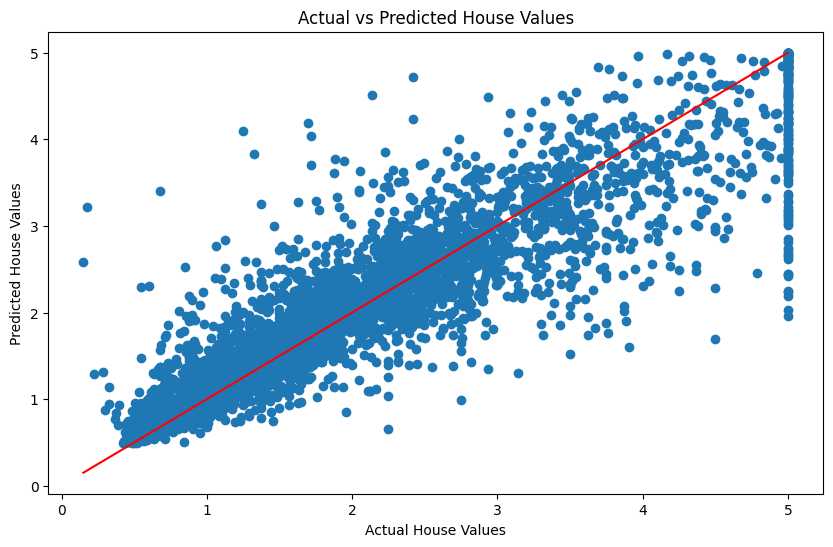

In [ ]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line showing perfect predictions
plt.xlabel('Actual House Values')
plt.ylabel('Predicted House Values')
plt.title('Actual vs Predicted House Values')
plt.show()

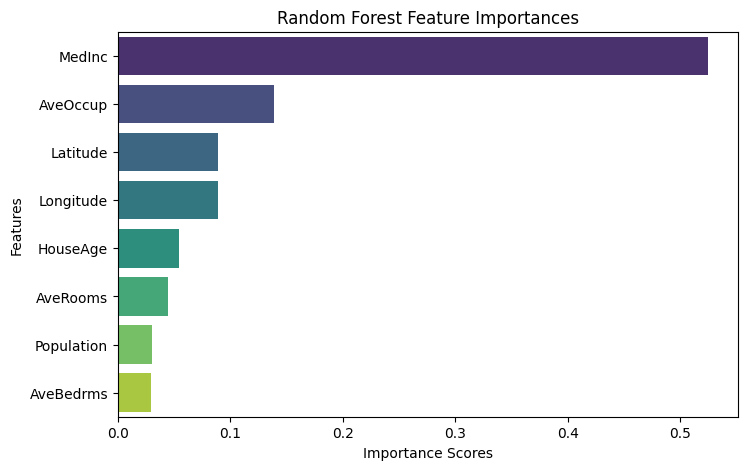

In [31]:
import pandas as pd
import seaborn as sns

importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', hue='Feature', palette='viridis', legend=False)
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance Scores")
plt.ylabel("Features")
plt.show()


The bar plot above shows the feature importances derived from the Random Forest model trained on the California housing dataset. Feature importance scores indicate how much each feature contributes to reducing the error in the model's predictions.

### Key Insights:
1. **Median Income (`MedInc`)**: This is by far the most important feature, with a significantly higher importance score compared to the others. This implies that median income has the largest impact on predicting house prices in this dataset.
   
2. **Average Occupants per Household (`AveOccup`)**: The second most important feature, suggesting that household occupancy levels are also crucial for predicting housing values.

3. **Geographical Features (`Latitude` and `Longitude`)**: These features are also relatively important, indicating that house prices vary significantly depending on the location within California.

4. **Other Features**: `HouseAge`, `AveRooms`, `Population`, and `AveBedrms` have lower importance scores, meaning they contribute less to the model's predictions.
